# This script contains the following:¶
1. Importing your libraries and data
2. Subsetting, wrangling, and cleaning time-series data
3. Time series analysis: decomposition
4. Testing for stationarity
5. Stationarizing the Federal Reserve Economic Data
# Bonus task
1. Defining Your Parameters
2. Splitting the Data
3. Running and Fitting the Model
4. Iterating

## Importing libraries and data

In [3]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [5]:
# Define path
path = r'C:\Users\shrav\_Data_Analysis_CF\Citi_bikes_project'

In [7]:
citi = pd.read_csv(os.path.join(path, '02 Data','prepared data', 'citi_7.csv'), index_col = False)

### Making sure ride start date is date time

In [10]:
# Define data types for specific columns
data_types = {
    'ride_start_date': 'datetime64'
}

In [12]:
file_path = os.path.join(path, '02 Data','prepared data','citi_7.csv')

In [14]:
parse_dates = ['ride_start_date']

In [16]:
citi = pd.read_csv(file_path, parse_dates=parse_dates)

In [18]:
citi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41017 entries, 0 to 41016
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               41017 non-null  int64         
 1   day_of_week              41017 non-null  object        
 2   start_hour               41017 non-null  int64         
 3   start_station_id         41017 non-null  int64         
 4   start_station_name       41017 non-null  object        
 5   start_station_latitude   41017 non-null  float64       
 6   start_station_longitude  41017 non-null  float64       
 7   end_station_id           41017 non-null  int64         
 8   end_station_name         41017 non-null  object        
 9   end_station_latitude     41017 non-null  float64       
 10  end_station_longitude    41017 non-null  float64       
 11  trip_duration            41017 non-null  int64         
 12  subscriber               41017 n

## cleaning, wrangling and  subsetting

In [21]:
#ride counts by day
day_counts = citi.groupby( citi['ride_start_date'].dt.date)['ride_start_date'].count()

In [23]:
day_counts

ride_start_date
2013-09-01     729
2013-09-02     708
2013-09-03    1331
2013-09-04    1469
2013-09-05    1372
2013-09-06    1452
2013-09-07    1134
2013-09-08    1129
2013-09-09    1393
2013-09-10    1579
2013-09-11    1532
2013-09-12    1339
2013-09-13    1630
2013-09-14    1129
2013-09-15    1169
2013-09-16    1291
2013-09-17    1596
2013-09-18    1600
2013-09-19    1578
2013-09-20    1703
2013-09-21    1165
2013-09-22    1061
2013-09-23    1498
2013-09-24    1662
2013-09-25    1598
2013-09-26    1683
2013-09-27    1535
2013-09-28    1248
2013-09-29    1102
2013-09-30    1602
Name: ride_start_date, dtype: int64

In [25]:
#avg duration trip on day
avg_ride_duration_day = citi.groupby('ride_start_date')['trip_duration'].mean()

In [27]:
avg_ride_duration_day

ride_start_date
2013-09-01    735.274348
2013-09-02    675.447740
2013-09-03    686.549962
2013-09-04    713.929204
2013-09-05    712.066327
2013-09-06    693.772039
2013-09-07    731.380952
2013-09-08    736.000000
2013-09-09    691.850682
2013-09-10    687.388220
2013-09-11    674.304830
2013-09-12    671.300971
2013-09-13    688.204294
2013-09-14    691.806023
2013-09-15    722.729683
2013-09-16    680.896979
2013-09-17    681.016291
2013-09-18    680.636875
2013-09-19    687.445501
2013-09-20    691.693482
2013-09-21    700.793133
2013-09-22    720.921772
2013-09-23    699.183578
2013-09-24    680.915162
2013-09-25    701.739675
2013-09-26    680.911468
2013-09-27    711.543974
2013-09-28    719.056090
2013-09-29    704.512704
2013-09-30    690.719725
Name: trip_duration, dtype: float64

In [29]:
#merging together
result = pd.DataFrame({'date': day_counts.index, 'ride_count': day_counts.values, 'avg_duration': avg_ride_duration_day.values})

In [31]:
result

,date,ride_count,avg_duration
0,2013-09-01,729,735.274348
1,2013-09-02,708,675.447740
2,2013-09-03,1331,686.549962
3,2013-09-04,1469,713.929204
4,2013-09-05,1372,712.066327
5,2013-09-06,1452,693.772039
6,2013-09-07,1134,731.380952
7,2013-09-08,1129,736.000000
8,2013-09-09,1393,691.850682
9,2013-09-10,1579,687.388220


In [33]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          30 non-null     object 
 1   ride_count    30 non-null     int64  
 2   avg_duration  30 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 852.0+ bytes


In [35]:
# Set the "Date" column as the index

from datetime import datetime

result['datetime'] = pd.to_datetime(result['date']) # Create a datetime column from "Date.""
result = result.set_index('datetime') # Set the datetime as the index of the dataframe.
result.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
result.head()

,ride_count,avg_duration
datetime,,
2013-09-01,729,735.274348
2013-09-02,708,675.447740
2013-09-03,1331,686.549962
2013-09-04,1469,713.929204
2013-09-05,1372,712.066327


### I selected these data points because they represent the first month of Citi Bike usage, which will help in identifying trends to potentially forecast ride counts for the second month. While my primary focus is on analyzing the relationship between the date and ride_count, I also included trip duration as an additional variable for potential exploration in future analyses.

In [39]:
# Reset index so that you can use the "Date" column as a filter

result_2 = result.reset_index()

In [42]:
result_2.head()

,datetime,ride_count,avg_duration
0,2013-09-01,729,735.274348
1,2013-09-02,708,675.447740
2,2013-09-03,1331,686.549962
3,2013-09-04,1469,713.929204
4,2013-09-05,1372,712.066327


In [44]:
result_3 = result_2[['datetime','ride_count']]

In [46]:
result_3

,datetime,ride_count
0,2013-09-01,729
1,2013-09-02,708
2,2013-09-03,1331
3,2013-09-04,1469
4,2013-09-05,1372
5,2013-09-06,1452
6,2013-09-07,1134
7,2013-09-08,1129
8,2013-09-09,1393
9,2013-09-10,1579


In [48]:
# Reset index so that you can use the "Date" column as a filter

result_3 = result.reset_index()

In [50]:
result_3

,datetime,ride_count,avg_duration
0,2013-09-01,729,735.274348
1,2013-09-02,708,675.447740
2,2013-09-03,1331,686.549962
3,2013-09-04,1469,713.929204
4,2013-09-05,1372,712.066327
5,2013-09-06,1452,693.772039
6,2013-09-07,1134,731.380952
7,2013-09-08,1129,736.000000
8,2013-09-09,1393,691.850682
9,2013-09-10,1579,687.388220


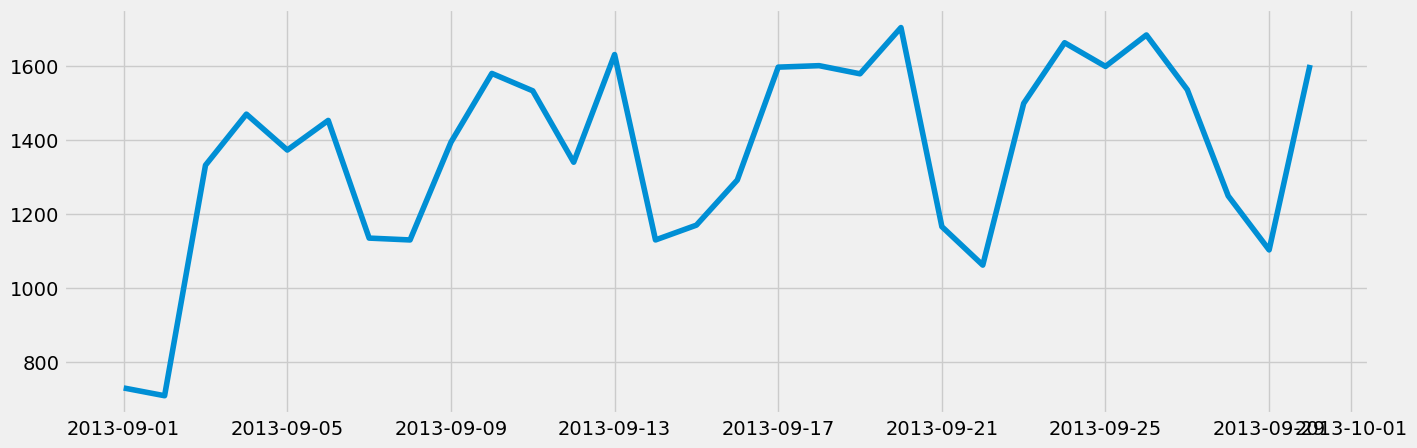

In [52]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(day_counts)

#### The line graph shows the daily ride counts for Citi Bike usage throughout September 2013. A clear pattern of fluctuation can be observed, with ride counts varying from day to day. Notably, there are recurring peaks and troughs, suggesting a potential weekly cycle where bike usage rises and falls.For example, ride counts tend to increase steadily early in the month, peak around the 10th, and then follow a similar pattern of rising and falling at regular intervals. This suggests that Citi Bike usage may be influenced by factors such as the day of the week, possibly reflecting higher demand on weekdays and lower demand on weekends.Further analysis, such as calculating the autocorrelation, could help confirm if this pattern is consistent over time and if specific days consistently show higher or lower ridership.

In [55]:
day_counts

ride_start_date
2013-09-01     729
2013-09-02     708
2013-09-03    1331
2013-09-04    1469
2013-09-05    1372
2013-09-06    1452
2013-09-07    1134
2013-09-08    1129
2013-09-09    1393
2013-09-10    1579
2013-09-11    1532
2013-09-12    1339
2013-09-13    1630
2013-09-14    1129
2013-09-15    1169
2013-09-16    1291
2013-09-17    1596
2013-09-18    1600
2013-09-19    1578
2013-09-20    1703
2013-09-21    1165
2013-09-22    1061
2013-09-23    1498
2013-09-24    1662
2013-09-25    1598
2013-09-26    1683
2013-09-27    1535
2013-09-28    1248
2013-09-29    1102
2013-09-30    1602
Name: ride_start_date, dtype: int64

In [57]:
# Check for missing values 

day_counts.isnull().sum() 

0

## Time series analysis - decomposition

In [62]:
result

,ride_count,avg_duration
datetime,,
2013-09-01,729,735.274348
2013-09-02,708,675.447740
2013-09-03,1331,686.549962
2013-09-04,1469,713.929204
2013-09-05,1372,712.066327
2013-09-06,1452,693.772039
2013-09-07,1134,731.380952
2013-09-08,1129,736.000000
2013-09-09,1393,691.850682


In [64]:
# dropping a column
column_to_drop = 'avg_duration'

In [66]:
result = result.drop(column_to_drop, axis=1)

In [68]:
result

,ride_count
datetime,
2013-09-01,729
2013-09-02,708
2013-09-03,1331
2013-09-04,1469
2013-09-05,1372
2013-09-06,1452
2013-09-07,1134
2013-09-08,1129
2013-09-09,1393


In [70]:
# Reset index so that you can use the "Date" column as a filter

result_1 = result.reset_index()

In [72]:
result_1

,datetime,ride_count
0,2013-09-01,729
1,2013-09-02,708
2,2013-09-03,1331
3,2013-09-04,1469
4,2013-09-05,1372
5,2013-09-06,1452
6,2013-09-07,1134
7,2013-09-08,1129
8,2013-09-09,1393
9,2013-09-10,1579


In [74]:
result_1.info

<bound method DataFrame.info of      datetime  ride_count
0  2013-09-01         729
1  2013-09-02         708
2  2013-09-03        1331
3  2013-09-04        1469
4  2013-09-05        1372
5  2013-09-06        1452
6  2013-09-07        1134
7  2013-09-08        1129
8  2013-09-09        1393
9  2013-09-10        1579
10 2013-09-11        1532
11 2013-09-12        1339
12 2013-09-13        1630
13 2013-09-14        1129
14 2013-09-15        1169
15 2013-09-16        1291
16 2013-09-17        1596
17 2013-09-18        1600
18 2013-09-19        1578
19 2013-09-20        1703
20 2013-09-21        1165
21 2013-09-22        1061
22 2013-09-23        1498
23 2013-09-24        1662
24 2013-09-25        1598
25 2013-09-26        1683
26 2013-09-27        1535
27 2013-09-28        1248
28 2013-09-29        1102
29 2013-09-30        1602>

In [76]:
time_series = result_1['ride_count']

In [78]:
result_1['datetime'] = pd.to_datetime(result_1['datetime'])

In [80]:
result_1.set_index('datetime', inplace=True)

In [82]:
result_1.index.freq = 'D'

In [84]:
time_series = result_1['ride_count']

In [86]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(time_series, model='additive')

In [88]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

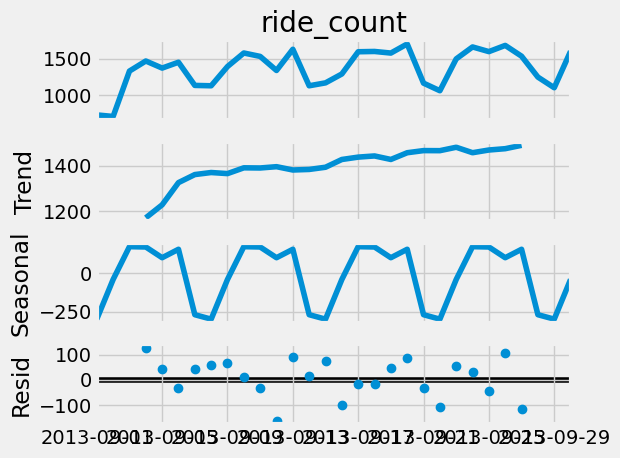

In [90]:
# Plot the separate components

decomposition.plot()
plt.show()

In [92]:
result_1

,ride_count
datetime,
2013-09-01,729
2013-09-02,708
2013-09-03,1331
2013-09-04,1469
2013-09-05,1372
2013-09-06,1452
2013-09-07,1134
2013-09-08,1129
2013-09-09,1393


#### The graph shows variability in both the level and trend of ride counts, indicating that the data would benefit from smoothing to better capture underlying patterns. There is a noticeable increasing trend over the course of the month, suggesting that ridership grows as time progresses. Additionally, the graph exhibits signs of seasonality, with recurring peaks and troughs likely corresponding to specific days of the week. However, there is also a significant amount of noise present, which could obscure some of the patterns and make it harder to identify precise trends without further filtering or smoothing.

## Testing for stationarity

In [96]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(result_1['ride_count'])

Dickey-Fuller Stationarity test:
Test Statistic                 -3.728335
p-value                         0.003732
Number of Lags Used             6.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


#### The p-value from the test is highly significant, providing strong evidence against the null hypothesis. The null hypothesis in this case asserts the presence of a unit root, which would indicate that the data is non-stationary. Our goal is to disprove this, as the presence of a unit root would imply non-stationarity, something undesirable for analysis.By comparing the test statistic to the critical values at both the 5% and 10% significance levels, we see that the test statistic is smaller than the critical values, further supporting the rejection of the null hypothesis. Additionally, the satisfactory p-value reinforces the conclusion that the data does not have a unit root, suggesting that the data is stationary, which is what we want for reliable forecasting and trend analysis.

#### it doesnt look like I need to perform differencing

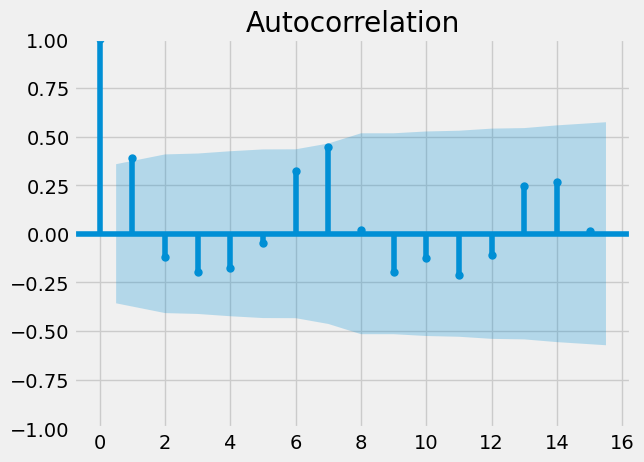

In [104]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(result_1)
plt.show()

In [106]:
# saving to csv
citi.to_csv(os.path.join(path, '02 Data','prepared data', 'citi_8.csv'))

# BONUS TASK

In [119]:
data_diff = result_1- result_1.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [121]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 

# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [123]:
data_diff.head()

,ride_count
datetime,
2013-09-02,-21.0
2013-09-03,623.0
2013-09-04,138.0
2013-09-05,-97.0
2013-09-06,80.0


In [125]:
data_diff.columns

Index(['ride_count'], dtype='object')

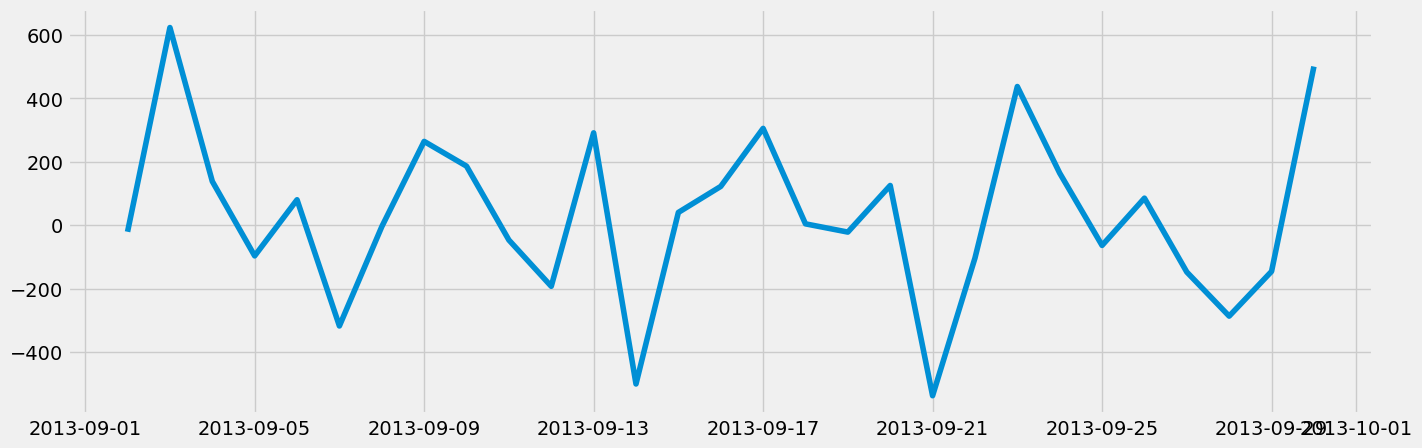

In [127]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [129]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -2.726936
p-value                         0.069492
Number of Lags Used             9.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
Critical Value (5%)            -3.031227
Critical Value (10%)           -2.655520
dtype: float64


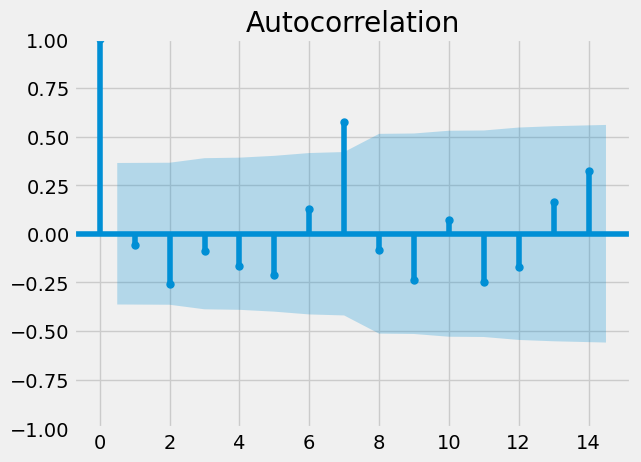

In [131]:
plot_acf(data_diff)
plt.show()

### I feel like the numbers were better before differencing 

In [136]:
result_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2013-09-01 to 2013-09-30
Freq: D
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ride_count  30 non-null     int64
dtypes: int64(1)
memory usage: 480.0 bytes


In [138]:
result_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      30 non-null     datetime64[ns]
 1   ride_count    30 non-null     int64         
 2   avg_duration  30 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 852.0 bytes


In [140]:
result_4= result_3.drop(column_to_drop, axis=1)

In [142]:
# Reset index so that you can use the "Date" column as a filter

result_4 = result_4.reset_index()

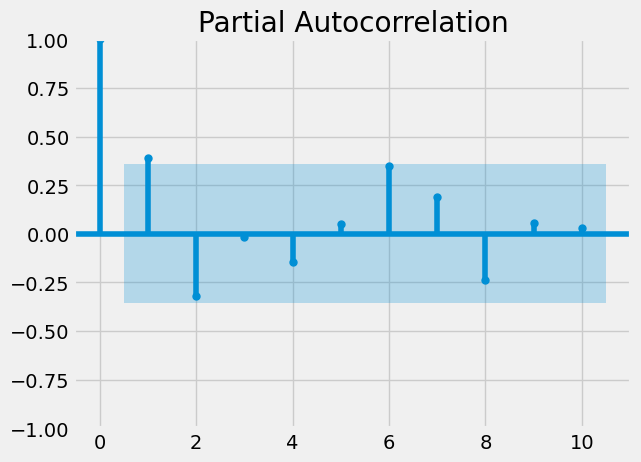

<Figure size 4500x4500 with 0 Axes>

In [144]:
# Plot partial autocorrelations to determine parameter p

plot_pacf(result_1['ride_count'], lags=10)  # Adjust the number of lags as needed
plt.figure(figsize=(15, 15), dpi=300)
plt.show()

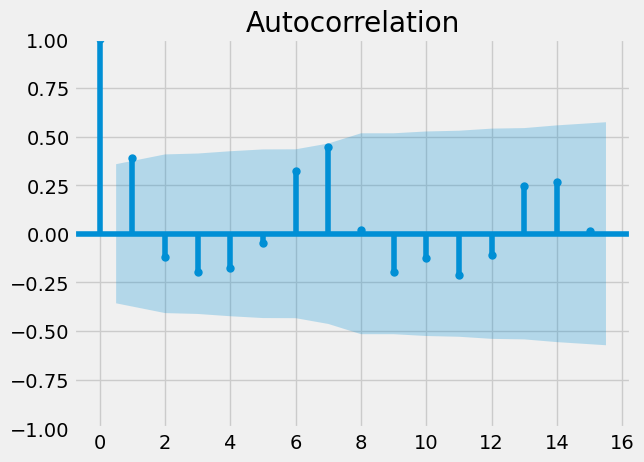

<Figure size 1500x500 with 0 Axes>

In [146]:
# Plot autocorrelations to determine parameter q

plot_acf(result_1)
plt.figure(figsize=(15,5), dpi=100)
plt.show()

In [148]:
# Split the data

train = result_1['ride_count'][:24]
test = result_1['ride_count'][23:]

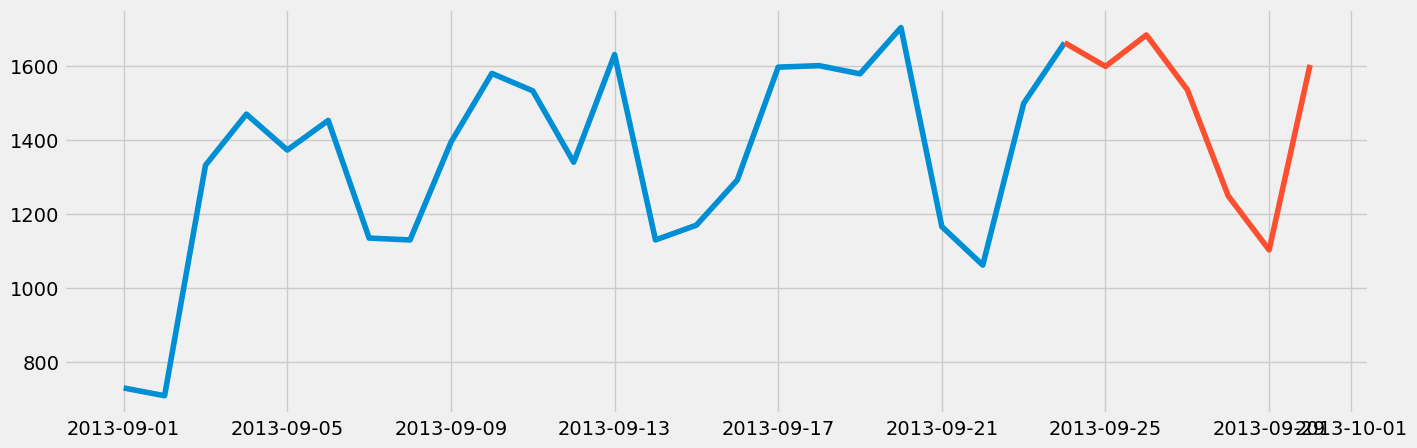

In [150]:
# Plot both sets in order to see the split

plt.figure(figsize=(15,5), dpi=100)
plt.plot(train)
plt.plot(test)

In [152]:
test.shape

(7,)

# run and fit model

In [158]:
from statsmodels.tsa.api import ARIMA # Import the model you need

In [160]:
from statsmodels.tsa.arima_model import ARMA

                               SARIMAX Results                                
Dep. Variable:             ride_count   No. Observations:                   24
Model:                 ARIMA(4, 0, 3)   Log Likelihood                -161.963
Date:                Mon, 21 Oct 2024   AIC                            341.927
Time:                        19:26:32   BIC                            352.529
Sample:                    09-01-2013   HQIC                           344.740
                         - 09-24-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1344.4120     46.769     28.746      0.000    1252.747    1436.077
ar.L1          0.6837      0.349      1.958      0.050      -0.001       1.368
ar.L2         -0.1725      0.263     -0.657      0.5

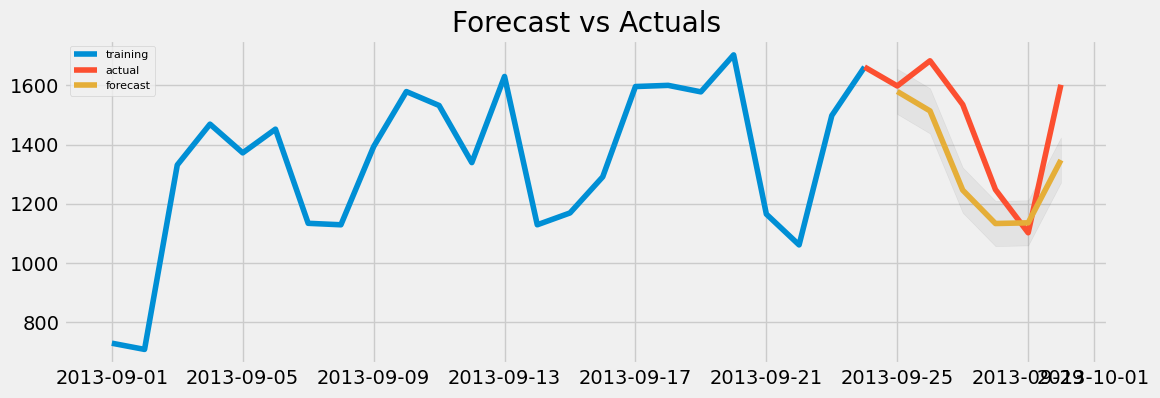

In [162]:
model = ARIMA(train, order=(4,0,3))  # Replace p, d, and q with appropriate values
fitted = model.fit()
print(fitted.summary())

# Forecast
forecast_steps = len(test)
fc = fitted.forecast(steps=forecast_steps, alpha=0.05)  # Forecasted values

# Compute standard errors
se = np.sqrt(fitted.forecast(steps=forecast_steps, alpha=0.05)[1])  # Standard errors

# Compute confidence interval
conf = 1.96 * se  # 95% confidence interval (for a two-sided interval)

# Create forecasted and confidence interval series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(fc - conf, index=test.index)
upper_series = pd.Series(fc + conf, index=test.index)

# Plot
plt.figure(figsize=(12, 4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Iterating

                               SARIMAX Results                                
Dep. Variable:             ride_count   No. Observations:                   24
Model:                 ARIMA(7, 0, 0)   Log Likelihood                -160.906
Date:                Mon, 21 Oct 2024   AIC                            339.812
Time:                        19:26:58   BIC                            350.415
Sample:                    09-01-2013   HQIC                           342.625
                         - 09-24-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1342.9658    168.870      7.953      0.000    1011.987    1673.944
ar.L1          0.3891      0.277      1.402      0.161      -0.155       0.933
ar.L2         -0.2598      0.352     -0.738      0.4

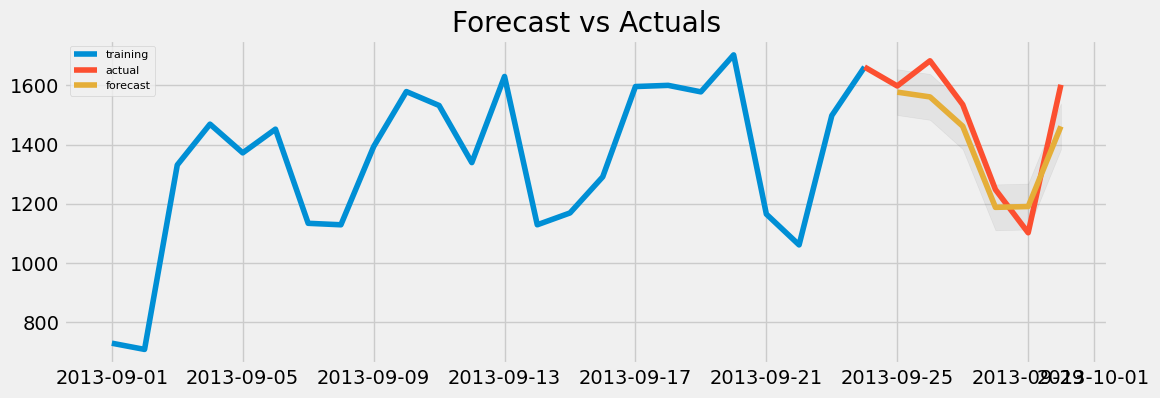

In [165]:
model = ARIMA(train, order=(7,0,0))  # Replace p, d, and q with appropriate values
fitted = model.fit()
print(fitted.summary())

# Forecast
forecast_steps = len(test)
fc = fitted.forecast(steps=forecast_steps, alpha=0.05)  # Forecasted values

# Compute standard errors
se = np.sqrt(fitted.forecast(steps=forecast_steps, alpha=0.05)[1])  # Standard errors

# Compute confidence interval
conf = 1.96 * se  # 95% confidence interval (for a two-sided interval)

# Create forecasted and confidence interval series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(fc - conf, index=test.index)
upper_series = pd.Series(fc + conf, index=test.index)

# Plot
plt.figure(figsize=(12, 4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#### I did about 10+ iterations and this one looks close in terms of the confidence level, but the coefficients dont really read as signifigant